In [2]:
import sys
from sys import platform
if platform  == 'win32':
    sys.argv=["_", r"P:\rmahajan14\capstone_data\data", r"P:\rmahajan14\capstone_data\cache"]
if platform == 'linux' or platform == 'linux2':
    def full_path(p):
        return os.path.abspath(os.path.expanduser(p))
    sys.argv=["_", r"/mnt/d/DiDi_Ride_Data/data", r"/mnt/d/DiDi_Ride_Data/Ride_Data_Cache"]

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [4]:
from loader1 import *
from utils import *
from common import *
from experiment2 import *
# from sys import platform

import warnings
warnings.filterwarnings('ignore')

In [5]:
import time

Basic Coding 

In [6]:
spatial_type = 'radial'
combine_pool = True

In [7]:
df_final_no_decay, target_df_no_decay = get_final_df_reg(use_cache=True, decay='No Decay', 
                                                         spatial_type=spatial_type, combine_pool=combine_pool)

../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
No Decay
(5909529, 6)
(5909529, 4)
(1181102, 4)
(1181102, 2)
(1181102, 3)
(945550, 6)
(1181102, 6)
Dumping to ../Ride_Data_Cache/active_times_pool_True.msgpack
Decay Calculation done in 156.77280688285828
1e
../Ride_Data_Cache/features_orders.msgpack exists
(1181102, 12)
Features created in 0.8946182727813721
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 3.5409820079803467


In [8]:
df_final_old_decay, target_df_old_decay = get_final_df_reg(use_cache=True, decay='Old Decay',
                                                           spatial_type=spatial_type,combine_pool=combine_pool)

../Ride_Data_Cache/merged_orders.msgpack exists
orders
Decay Calculation
Old Decay
Creating the exponential decay
Dumping to ../Ride_Data_Cache/idle_times_old_pool_True.msgpack
Decay Calculation done in 97.06916189193726
1e
../Ride_Data_Cache/features_orders.msgpack exists
(1181102, 12)
Features created in 0.8758330345153809
1f
../Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 4.25482964515686


In [7]:
# Using the function create_modified_active_time_through_decay2 
# instead of create_modified_active_time_through_decay
df_final_new_decay1, target_df_new_decay1 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=1, spatial_type=spatial_type, combine_pool=combine_pool)
df_final_new_decay10, target_df_new_decay10 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=10, spatial_type=spatial_type, combine_pool=combine_pool)
df_final_new_decay100, target_df_new_decay100 = get_final_df_reg(use_cache=True, decay='New Decay', mult_factor=100, spatial_type=spatial_type, combine_pool=combine_pool)

file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161101.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161102.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161103.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161104.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161105.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161106.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161107.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161108.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161109.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161110.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161111.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161112.msgpack
file path is /mnt/d/DiDi_Ride_Data/Ride_Data_Cache/order_20161113.msgpack
file path is /mnt/d/DiDi_Ride_Data/Rid

Decay Calculation done in 53.767406702041626
1e
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/features_orders.msgpack exists
(1181102, 12)
Features created in 1.546173095703125
1f
/mnt/d/DiDi_Ride_Data/Ride_Data_Cache/radial_spatial_df.msgpack exists
spatial
Spatial Calculation done in 9.477373123168945


In [10]:
df_list = [df_final_no_decay, df_final_old_decay, df_final_new_decay1, 
           df_final_new_decay10, df_final_new_decay100]
target_df_list = [target_df_no_decay, target_df_old_decay, target_df_new_decay1, 
                  target_df_new_decay10, target_df_new_decay100]
name_list = ['no_decay', 'old_decay', 'new_decay1', 'new_decay10', 'new_decay100']

In [11]:
for name, target in zip(name_list, target_df_list):
    print(name, 100*target[target.target > 1].shape[0]/target.shape[0])

no_decay 1.099989670663499
old_decay 0.013292670743085695
new_decay1 0.013377337435716813
new_decay10 0.017695338759903888
new_decay100 0.021590006620935364


In [ ]:
 target_df_new_decay100[target_df_new_decay100.target > 1].head(10)

### Modelling Code 

We have till now coded the following models 

1. Linear Regression 
2. Linear Regression with L1 Regularization
3. Linear Regression with L2 Regularization
4. Random Forest Regressor 

Now we split the data in a ratio of 75:25

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [12]:
def build_model(df, target_df, name, seed=0):
    # regression forest
    print(f'building regression model for {name}')
    X = df    
    xtrain, xtest, ytrain, ytest = train_test_split(X, target_df['target'], random_state=seed)

    sc = StandardScaler()

    xtrain_sc = sc.fit_transform(xtrain)

    rr = RandomForestRegressor(random_state=seed, n_jobs=-1)
    rr.fit(xtrain_sc, ytrain)

    xtest_sc = sc.transform(xtest)
    
    print(rr.score(xtest_sc, ytest))
    
    return rr, rr.score(xtest_sc, ytest)

In [ ]:
df_list = [df_final_no_decay, df_final_old_decay, df_final_new_decay1, 
           df_final_new_decay10, df_final_new_decay100, df_final_new_decay_surv]
target_df_list = [target_df_no_decay, target_df_old_decay, target_df_new_decay1, 
                  target_df_new_decay10, target_df_new_decay100, target_df_new_decay_surv]
name_list = ['no_decay', 'old_decay', 'new_decay1', 'new_decay10', 'new_decay100', 'survival']

In [14]:
result = {}
model = {}
for df, target_df, name in zip(df_list, target_df_list, name_list):
    model[name], result[name] = build_model(df, target_df, name)

building regression model for no_decay
0.4649685077681313
building regression model for old_decay
0.6724090752882014
building regression model for new_decay1
0.6634822551987518
building regression model for new_decay10
0.7425964330381697
building regression model for new_decay100
0.7948263998299887


In [15]:
result

{'no_decay': 0.4649685077681313,
 'old_decay': 0.6724090752882014,
 'new_decay1': 0.6634822551987518,
 'new_decay10': 0.7425964330381697,
 'new_decay100': 0.7948263998299887}

In [ ]:
# list(new_df.columns)

In [17]:
columns = df_final_new_decay100.columns

In [19]:
importances = forest.feature_importances_

In [34]:
import numpy as np

In [124]:


def feature_importance(df, model, k = 10):
    columns = df.columns
    new_col = []
    for col in columns:
        if 'days' in col:
            new_col += ['temporal']
        elif '.' in col:
            new_col += ['spatial']
        else:
            new_col += [col]
    forest = model
    X = df
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    for i in indices[0:k]:
        print(columns[i], importances[i])

    # # Plot the feature importances of the forest
    fig, ax = plt.subplots(figsize=(24, 10)) 
    bar_x = range(k)
    bar_height = np.log(10 ** 4 * importances[indices[0:k]])
    bar_tick_label = [f'F{x}' for x in range(1, k+1)]
    val = [new_col[x] for x in indices[0:k]]
#     breakpoint()
#     print(new_col[indices[0:k]])
    bar_label = val
    
    bar_plot = plt.bar(bar_x,bar_height)#,tick_label=bar_tick_label, labelsize=20)
    
    def autolabel(rects):
        for idx,rect in enumerate(bar_plot):
            height = rect.get_height()
#             print(height)
            ax.text(rect.get_x() + rect.get_width()/2., 0.5, #0.5*height,
                    bar_label[idx].title(), color='white',
                    ha='center', va='bottom', rotation=90, fontsize=25)
#             print()
        
    autolabel(bar_plot)
    
#     ax.bar(range(k), np.log(10 ** 4 * importances[indices:k]]))
#     plt.title("Feature importances")
#     print()
#     ax.bar(range(k), np.log(10 ** 4 * importances[indices[0:k]]),
#             yerr=std[indices[0:k]], align="center")
#     plt.xticks(range(k), columns[indices[0:k]], rotation=90)
#     plt.xlim([-1, k])
    plt.ylim(0,10)
#     plt.figsize(20,10)
    plt.xticks([])

    plt.ylabel('Scaled Log of Feature Importance', fontsize=25)

#     plt.title('Feature Importance', fontsize=30)

    plt.savefig("Feature_Importance.png", bbox_inches='tight')
    plt.show()

Feature ranking:
num_total_rides 0.6424526463671741
inactive_time 0.12443557957214348
% of pool rides 0.028914372092708425
(0 days 00:00:44.999999, 0 days 10:36:30]_count 0.012748310888819062
(0 days 18:45:25, 0 days 23:59:59]_sum 0.009874574016017759
(0 days 14:43:06, 0 days 18:45:25]_sum 0.008140735708655263
(0 days 00:00:44.999999, 0 days 10:36:30]_sum 0.007061750780898936
(9509.75, 78107.176](-180.001, -99.688] 0.006584356216630291
(0 days 10:36:30, 0 days 14:43:06]_sum 0.00638144276892111
(9509.75, 78107.176](-99.688, -38.414] 0.0037454332670955517


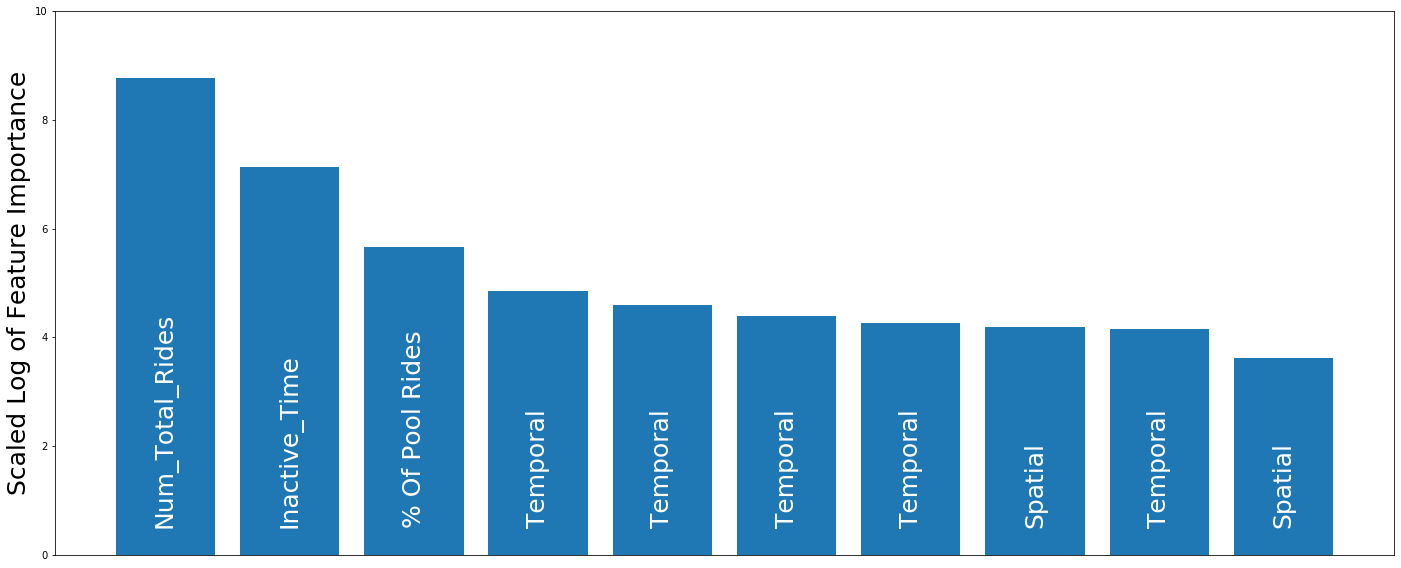

In [125]:
feature_importance(df_final_new_decay100, model['new_decay100'], k=10)

Feature ranking:
num_total_rides 0.5628969203472598
inactive_time 0.17494781197831116
% of pool rides 0.02176238580515264
(0 days 00:00:44.999999, 0 days 10:36:30]_count 0.01699379600808195
(0 days 00:00:44.999999, 0 days 10:36:30]_sum 0.01030695590282176
(0 days 18:45:25, 0 days 23:59:59]_sum 0.010210041061632813
(0 days 14:43:06, 0 days 18:45:25]_sum 0.008226843522201713
(0 days 10:36:30, 0 days 14:43:06]_sum 0.006200373399551233
(9509.75, 78107.176](-180.001, -99.688] 0.005330204743020752
(0 days 14:43:06, 0 days 18:45:25]_count 0.0033492916761574372


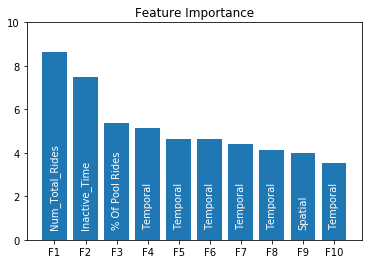

In [104]:
feature_importance(df_final_new_decay10, model['new_decay10'], k=10)

In [ ]:
forest = model['new_decay100']
X = df_final_new_decay100
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(importances)

print(indices)
# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

for i in indices:
    print(columns[i], importances[i])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Param Tuning

In [35]:
def get_test_train(X, target_df, seed):
    X = df    
    xtrain, xtest, ytrain, ytest = train_test_split(X, target_df['target'], random_state=seed)

    sc = StandardScaler()

    xtrain_sc = sc.fit_transform(xtrain)
    
    xtest_sc = sc.transform(xtest)
    
    return xtrain_sc, xtest_sc, ytrain, ytest

def build_model(xtrain_sc, 
                xtest_sc, 
                ytrain,
                ytest, 
                name,
                seed=0,
                n_estimators=100,
                max_depth=None,
                min_samples_split=2,
                max_features='auto'):
    
    # regression forest
     
    params = {'n_estimators': n_estimators,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'max_features': max_features} 

    rr = RandomForestRegressor(random_state=seed, n_jobs=-1, **params)
    rr.fit(xtrain_sc, ytrain)

    print(rr.score(xtest_sc, ytest))
    
    return rr, rr.score(xtest_sc, ytest)

In [36]:
# Param tuning
params = {'n_estimators': [10, 50, 100, 150, 200],
         'max_depth': [5, 10, 20, 25, 50],
         'min_samples_split': [2, 4, 8, 16, 32],
         'max_features': ['sqrt', 'log2']}

In [30]:
df_list = [df_final_new_decay100]
target_df_list = [target_df_new_decay100]
name_list = ['new_decay100']

In [26]:
xtrain_sc, xtest_sc, ytrain, ytest = get_test_train(df_final_new_decay100, target_df_new_decay100, 0)

In [ ]:
# num estimators
for n in params['n_estimators']:
    print(f"n_estimators = {n}")
    build_model(xtrain_sc, xtest_sc, ytrain, ytest, 'new_decay100', n_estimators=n)

n_estimators = 10
0.794427381704192
n_estimators = 50
